# Fitting data with polynomials

In [187]:
%matplotlib notebook
import matplotlib.pyplot as plt
from numpy import *
import matplotlib.animation as animation
from IPython.display import HTML

Traceback (most recent call last):
  File "/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [188]:
def generate_points(loc, scale, size):
    noise = np.random.normal(loc, scale, size)
    x = (.6)*np.arange(1,size+1)
    y = np.cos(x) + noise
    plt.scatter(x,y)
    plt.show()
    return array([x,y])

In [189]:




# def animate(i):
#     line.set_ydata(sin(x + i/10.0))  # update the data
#     return line,


# # Init only required for blitting to give a clean slate.
# def init():
#     line.set_ydata(ma.array(x, mask=True))
#     return line,

# ani = animation.FuncAnimation(fig, animate, arange(1, 200), init_func=init,
#                               interval=25, blit=True)


# HTML(ani.to_jshtml())

# def abline(slope, intercept):
#     """Plot a line from slope and intercept"""
#     axes = plt.gca()
#     x_vals = np.array(axes.get_xlim())
#     y_vals = intercept + slope * x_vals
#     plt.plot(x_vals, y_vals, '--')

def plot_points(x,y,b,m):
    abline_values =[m * i + b for i in x]
    plt.scatter(x, y)
    
    plt.plot(x, abline_values, 'b')
    axes = plt.gca()
    axes.set_xlim([0,100])
    axes.set_ylim([0,150])
    plt.show()

# Compute Error for each points # 


#### Divide Sum of error by total number of points 

In [190]:
# y = mx + b
# m is slope, b is y-intercept
def compute_error(b, m, points):
    sum_error = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        sum_error += (y - (m * x + b))**2
    return sum_error / float(len(points))

# Gradient Descent #

In [191]:
def gradient(current_b, current_m, points, learning_rate):
    #gradient descent
    gradient_b = 0
    gradient_m = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        gradient_b += -(2/N) * (y - (current_m * x + current_b))
        gradient_m += -(2/N) * x * (y - (current_m * x + current_b))
    new_b = current_b - (learning_rate * gradient_b)
    new_m = current_m - (learning_rate * gradient_m)
    return [new_b, new_m]

In [192]:
def gradient_descent_runner(x,y,points, initial_b, initial_m, learning_rate, number_iterations):
    b = initial_b
    m = initial_m
    
    gradient_vals=[]
    for i in range(number_iterations):
        b, m = gradient(b, m, array(points), learning_rate)
        print("Iteration #{0} b = {1}, m = {2}, error = {3}".format(i,b,m,compute_error(b,m,points)))
        gradient_vals.append([i,b,m])
    
    
    return [b,m,gradient_vals]

In [193]:
loc = 0
scale = 0.25
size = 20
    
#points = generate_points(loc,scale,size)    
points = genfromtxt("data.csv", delimiter=",")

    
    
    
    
    
#hyperparameters
learning_rate = 0.000005
#y = mx + b (slope formula)
initial_b = 0
initial_m = 0
num_iterations = 200
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error(initial_b, initial_m, points)))
print("running...")
[b, m,gradient_vals] = gradient_descent_runner(x,y,points, initial_b, initial_m, learning_rate, num_iterations)
print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations,b,m,compute_error(b,m,points)))




Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
running...
Iteration #0 b = 0.0007273505055368648, m = 0.03685351486795526, error = 5296.751517883232
Iteration #1 b = 0.0014366508679190342, m = 0.0727886668849938, error = 5041.603028410295
Iteration #2 b = 0.002128350882868347, m = 0.10782834095035759, error = 4799.012309822763
Iteration #3 b = 0.0028028891375415726, m = 0.1419948516891178, error = 4568.361300022541
Iteration #4 b = 0.0034606932898392693, m = 0.17530995766297064, error = 4349.062356383331
Iteration #5 b = 0.004102180340754483, m = 0.20779487522691084, error = 4140.5567585802355
Iteration #6 b = 0.004727756899934728, m = 0.23947029204060782, error = 3942.313285106377
Iteration #7 b = 0.005337819444626359, m = 0.27035638024308833, error = 3753.826859849784
Iteration #8 b = 0.005932754572166255, m = 0.3004728092991163, error = 3574.617265282426
Iteration #9 b = 0.0065129392461815965, m = 0.3298387585254505, error = 3404.227918982811
Iteration #10 b = 

<IPython.core.display.Javascript object>


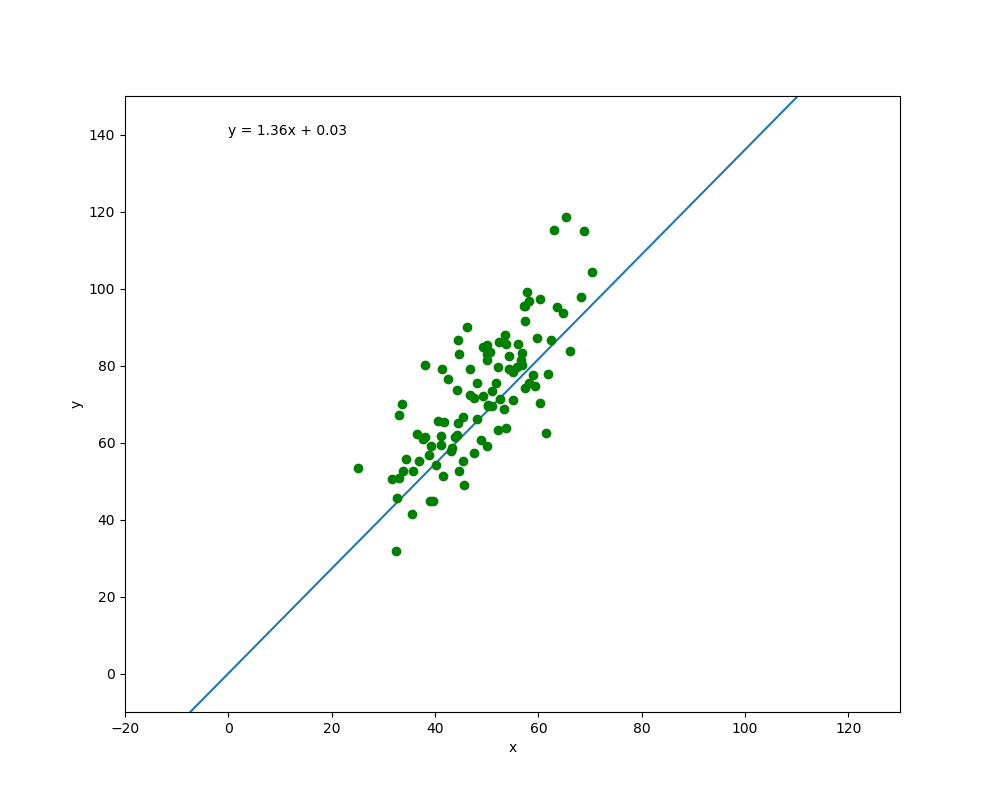

In [226]:
%matplotlib notebook
# A simple example of an animated plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()
# Initial plot
x_val = np.arange(-30., 150., 1)
y_val = [i*0 for i in range(0,180)]
line, = ax.plot(x_val, y_val)

x=[]
y=[]
for i in range(0, len(points)):    
    x.append(points[i,0])
    y.append(points[i,1])  

plt.rcParams["figure.figsize"] = (10,8)
plt.ylabel("y")
plt.xlabel("x")
plt.xlim( -20, 130 )
plt.ylim( -10, 150 )
plt.plot(x, y, 'go', label='Training data')
#ax.plot(test_house_size, test_house_price, 'mo', label='Testing data')

time_text = plt.text(0,140,"y = {0}x + {1}".format(0,0))

def animate(i):
    print(i)    
    num = gradient_vals[i][0]
    b = gradient_vals[i][1]
    m = gradient_vals[i][2]
    x_val = np.arange(-35., 170, 1)
    line.set_xdata(x_val)  
    line.set_ydata(m*x_val+b) 
    
    time_text.set_text("y = {0}x + {1}".format(round(m,2),round(b,2)))
    
    return line, time_text


def init():
    line.set_ydata(y_val)
    return line,

ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, 200), init_func=init, interval=200, blit=True)
plt.show()